
🌲 Random Forest Accuracy: 0.9887
📊 Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     68921
           1       0.99      0.96      0.98     21115

    accuracy                           0.99     90036
   macro avg       0.99      0.98      0.98     90036
weighted avg       0.99      0.99      0.99     90036


🚀 XGBoost Accuracy: 0.9890
📊 Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     68921
           1       0.99      0.96      0.98     21115

    accuracy                           0.99     90036
   macro avg       0.99      0.98      0.98     90036
weighted avg       0.99      0.99      0.99     90036



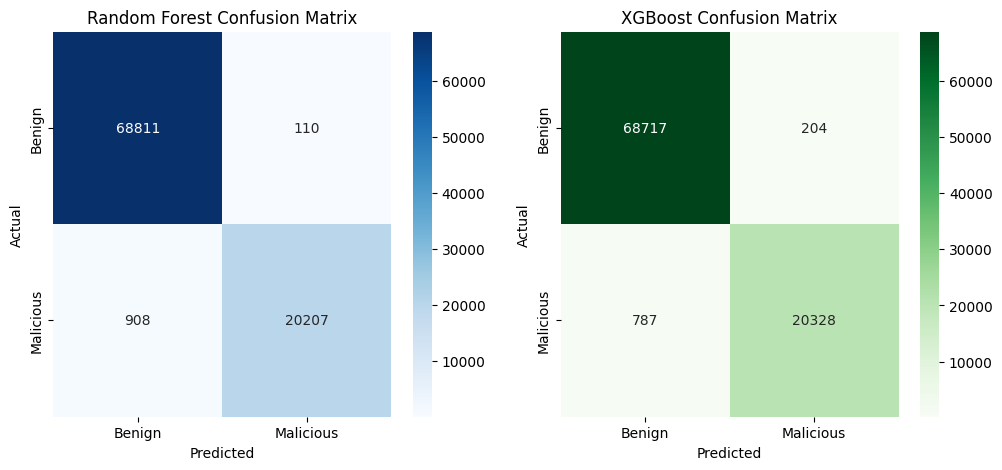


Enter a URL to check (or type 'exit' to quit):  https://www.google.com


🌲 Random Forest Prediction: 🟢 Benign | 🚀 XGBoost Prediction: 🟢 Benign



Enter a URL to check (or type 'exit' to quit):  http://atualizacaodedados.online


🌲 Random Forest Prediction: 🔴 Malicious | 🚀 XGBoost Prediction: 🔴 Malicious



Enter a URL to check (or type 'exit' to quit):  exit


In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("/kaggle/input/malicious-and-benign-urls/urldata.csv")

# Feature Extraction Function
def extract_features(url):
    url = url.lower()
    return {
        'url_length': len(url),
        'num_digits': sum(c.isdigit() for c in url),
        'num_special_chars': len(re.findall(r'[^a-zA-Z0-9]', url)),
        'has_ip': 1 if re.match(r'\d+\.\d+\.\d+\.\d+', url) else 0,
        'num_subdomains': url.count('.'),
        'has_https': 1 if url.startswith('https') else 0,
        'has_at_symbol': 1 if '@' in url else 0,
        'num_query_params': url.count('?') + url.count('&'),
    }

# Apply Feature Extraction
df_features = df['url'].apply(lambda x: pd.Series(extract_features(str(x))))

# Encode labels (0 = Benign, 1 = Malicious)
df['label'] = df['label'].map({'benign': 0, 'malicious': 1})

# Combine features with labels
data = pd.concat([df_features, df['label']], axis=1)

# Split dataset
X = data.drop(columns=['label'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### 🔹 Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=200,  
    max_depth=15,        
    min_samples_split=10,
    min_samples_leaf=5,  
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\n🌲 Random Forest Accuracy: {rf_accuracy:.4f}")
print("📊 Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

### 🔹 Train XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=200,      
    max_depth=10,          
    learning_rate=0.1,     
    subsample=0.8,        
    colsample_bytree=0.8,  
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"\n🚀 XGBoost Accuracy: {xgb_accuracy:.4f}")
print("📊 Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# Compare Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# XGBoost Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

# Function to predict a single URL with both models
def predict_url(url):
    features = pd.DataFrame([extract_features(url)])  # Extract features
    rf_prediction = rf_model.predict(features)[0]
    xgb_prediction = xgb_model.predict(features)[0]
    
    rf_result = "🔴 Malicious" if rf_prediction == 1 else "🟢 Benign"
    xgb_result = "🔴 Malicious" if xgb_prediction == 1 else "🟢 Benign"
    
    return f"🌲 Random Forest Prediction: {rf_result} | 🚀 XGBoost Prediction: {xgb_result}"

# User Input for URL Prediction
while True:
    user_url = input("\nEnter a URL to check (or type 'exit' to quit): ")
    if user_url.lower() == 'exit':
        break
    print(predict_url(user_url))
